<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/SEM1/ML/SVM_CM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Flatten,Dense,Activation
from keras.optimizers import Adam


In [2]:
%pip install mealpy

In [3]:
from mealpy.optimizer import Optimizer

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
from scipy.io import arff
import pandas as pd

df= arff.loadarff("CM1.arff")
data = pd.DataFrame(df[0])


originalfeatures= data.columns
print('original features len', len(originalfeatures))
print('original features', (originalfeatures))
print(data.head())

original features len 38
original features Index(['LOC_BLANK', 'BRANCH_COUNT', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT',
       'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY',
       'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY',
       'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT',
       'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE',
       'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY',
       'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH',
       'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME',
       'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT',
       'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT',
       'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'NUMBER_OF_LINES',
       'PERCENT_COMMENTS', 'LOC_TOTAL', 'Defective'],
      dtype='object')
   LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0      

In [6]:
def map_to_int(value):
    if value == b'Y':
        return 1
    elif value == b'N':
        return 0
    else:
        return None

# Apply the mapping function to the 'object_column' and create a new column 'integer_column'
data['Defective'] = data['Defective'].apply(map_to_int)

In [7]:
X=data.drop(labels=['Defective'], axis=1)
y=data['Defective']

In [8]:
# Data Cleaning
# Check for non-numeric value in each column and replace missing values with mean

for column in data.columns:
    # Convert the column to numeric, coercing errors to NaN
    numeric_column = pd.to_numeric(data[column], errors='coerce')

    # Identify indices where non-numeric values exist
    non_numeric_indices = pd.isna(numeric_column)

    if non_numeric_indices.any():
        # Print the column name and indices of non-numeric values
        print(f"Column '{column}' contains non-numeric values at indices: {non_numeric_indices[non_numeric_indices].index.tolist()}")

        # Replace missing values with the mean of the column
        mean_col = numeric_column.mean()
        data[column].fillna(mean_col, inplace=True)

        print(f"Missing values in column '{column}' replaced with mean: {mean_col}")
    else:
        # Print a message if the column contains only numeric values
        print(f"Column '{column}' contains only numeric values.")

Column 'LOC_BLANK' contains only numeric values.
Column 'BRANCH_COUNT' contains only numeric values.
Column 'CALL_PAIRS' contains only numeric values.
Column 'LOC_CODE_AND_COMMENT' contains only numeric values.
Column 'LOC_COMMENTS' contains only numeric values.
Column 'CONDITION_COUNT' contains only numeric values.
Column 'CYCLOMATIC_COMPLEXITY' contains only numeric values.
Column 'CYCLOMATIC_DENSITY' contains only numeric values.
Column 'DECISION_COUNT' contains only numeric values.
Column 'DECISION_DENSITY' contains only numeric values.
Column 'DESIGN_COMPLEXITY' contains only numeric values.
Column 'DESIGN_DENSITY' contains only numeric values.
Column 'EDGE_COUNT' contains only numeric values.
Column 'ESSENTIAL_COMPLEXITY' contains only numeric values.
Column 'ESSENTIAL_DENSITY' contains only numeric values.
Column 'LOC_EXECUTABLE' contains only numeric values.
Column 'PARAMETER_COUNT' contains only numeric values.
Column 'HALSTEAD_CONTENT' contains only numeric values.
Column 'HA

In [9]:
data.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,...,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,16.767584,13.015291,3.795107,5.657492,17.470948,20.917431,7.324159,0.166422,9.871560,2.119113,...,25.480122,0.104771,76.963303,120.189602,35.443425,19.088685,82.428135,29.584343,46.844037,0.128440
std,23.162161,16.843098,3.941782,10.095501,30.508948,27.275282,9.455683,0.061612,12.704113,0.320483,...,29.187338,0.055726,98.531729,150.976639,38.176965,9.304400,95.848744,18.805039,56.157181,0.335092
min,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.040000,2.000000,2.000000,...,5.000000,0.020000,4.000000,7.000000,3.000000,4.000000,9.000000,0.000000,7.000000,0.000000
25%,4.000000,5.000000,1.000000,0.000000,1.000000,8.000000,3.000000,0.130000,4.000000,2.000000,...,9.000000,0.070000,22.000000,38.000000,13.000000,13.000000,28.000000,13.890000,18.000000,0.000000
50%,9.000000,7.000000,3.000000,2.000000,8.000000,12.000000,4.000000,0.160000,6.000000,2.000000,...,15.000000,0.090000,40.000000,68.000000,22.000000,17.000000,52.000000,31.250000,28.000000,0.000000
75%,20.000000,15.000000,5.000000,6.000000,20.500000,24.000000,8.000000,0.190000,12.000000,2.085000,...,31.000000,0.130000,92.500000,136.500000,42.000000,23.000000,90.500000,45.115000,53.000000,0.000000
max,164.000000,162.000000,26.000000,80.000000,339.000000,248.000000,96.000000,0.560000,118.000000,5.000000,...,251.000000,0.500000,798.000000,1229.000000,314.000000,72.000000,764.000000,71.930000,503.000000,1.000000


In [10]:
import numpy as np
import pandas as pd

def find_outliers_IQR(df, column_name):
    """
    Identify and replace outliers in a specified column using the IQR method.

    Parameters:
    - df: pandas DataFrame
        The DataFrame containing the data.
    - column_name: str
        The name of the column for which outliers should be identified and replaced.

    Returns:
    - df: pandas DataFrame
        The DataFrame with outliers replaced in the specified column.
    """

    # Calculate the upper and lower limits
    upper_limit = df[column_name].mean() + 3 * df[column_name].std()
    lower_limit = df[column_name].mean() - 3 * df[column_name].std()

    # Replace outliers with the upper or lower limit
    df[column_name] = np.where(df[column_name] > upper_limit, upper_limit,
                               np.where(df[column_name] < lower_limit, lower_limit, df[column_name]))

    return df

# Example usage:
# Assuming 'data' is your DataFrame and 'LOC_BLANK' is the column to process
# data = find_outliers_IQR(data, 'LOC_BLANK')


In [11]:
import pandas as pd

# Assuming you have a DataFrame named 'data'
# You may need to import the find_outliers_IQR function from the previous response

def find_outliers_for_all_columns(df):
    """
    Identify and replace outliers in all columns of a DataFrame using the IQR method.

    Parameters:
    - df: pandas DataFrame
        The DataFrame containing the data.

    Returns:
    - df: pandas DataFrame
        The DataFrame with outliers replaced in all columns.
    """
    for column in df.columns:
        df = find_outliers_IQR(df, column)

    return df

# Example usage:
X = find_outliers_for_all_columns(X)
X.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,...,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,15.851757,12.312472,3.697560,5.227988,16.128407,19.844657,6.900477,0.165459,9.381918,2.103525,...,9.953143,24.376920,0.103755,73.502602,114.683785,34.228887,18.908291,78.816043,29.584343,44.561400
std,18.717681,12.530876,3.516074,7.994678,21.868581,21.021845,6.781581,0.057375,9.880034,0.229738,...,10.545518,23.264652,0.050914,81.086982,122.466206,32.275849,8.538237,77.305930,18.805039,42.904126
min,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.040000,2.000000,2.000000,...,2.000000,5.000000,0.020000,4.000000,7.000000,3.000000,4.000000,9.000000,0.000000,7.000000
25%,4.000000,5.000000,1.000000,0.000000,1.000000,8.000000,3.000000,0.130000,4.000000,2.000000,...,4.000000,9.000000,0.070000,22.000000,38.000000,13.000000,13.000000,28.000000,13.890000,18.000000
50%,9.000000,7.000000,3.000000,2.000000,8.000000,12.000000,4.000000,0.160000,6.000000,2.000000,...,6.000000,15.000000,0.090000,40.000000,68.000000,22.000000,17.000000,52.000000,31.250000,28.000000
75%,20.000000,15.000000,5.000000,6.000000,20.500000,24.000000,8.000000,0.190000,12.000000,2.085000,...,12.000000,31.000000,0.130000,92.500000,136.500000,42.000000,23.000000,90.500000,45.115000,53.000000
max,86.254067,63.544584,15.620453,35.943995,108.997793,102.743278,35.691207,0.351258,47.983900,3.080562,...,51.525395,113.042135,0.271949,372.558491,573.119520,149.974321,47.001886,369.974367,71.930000,215.315580


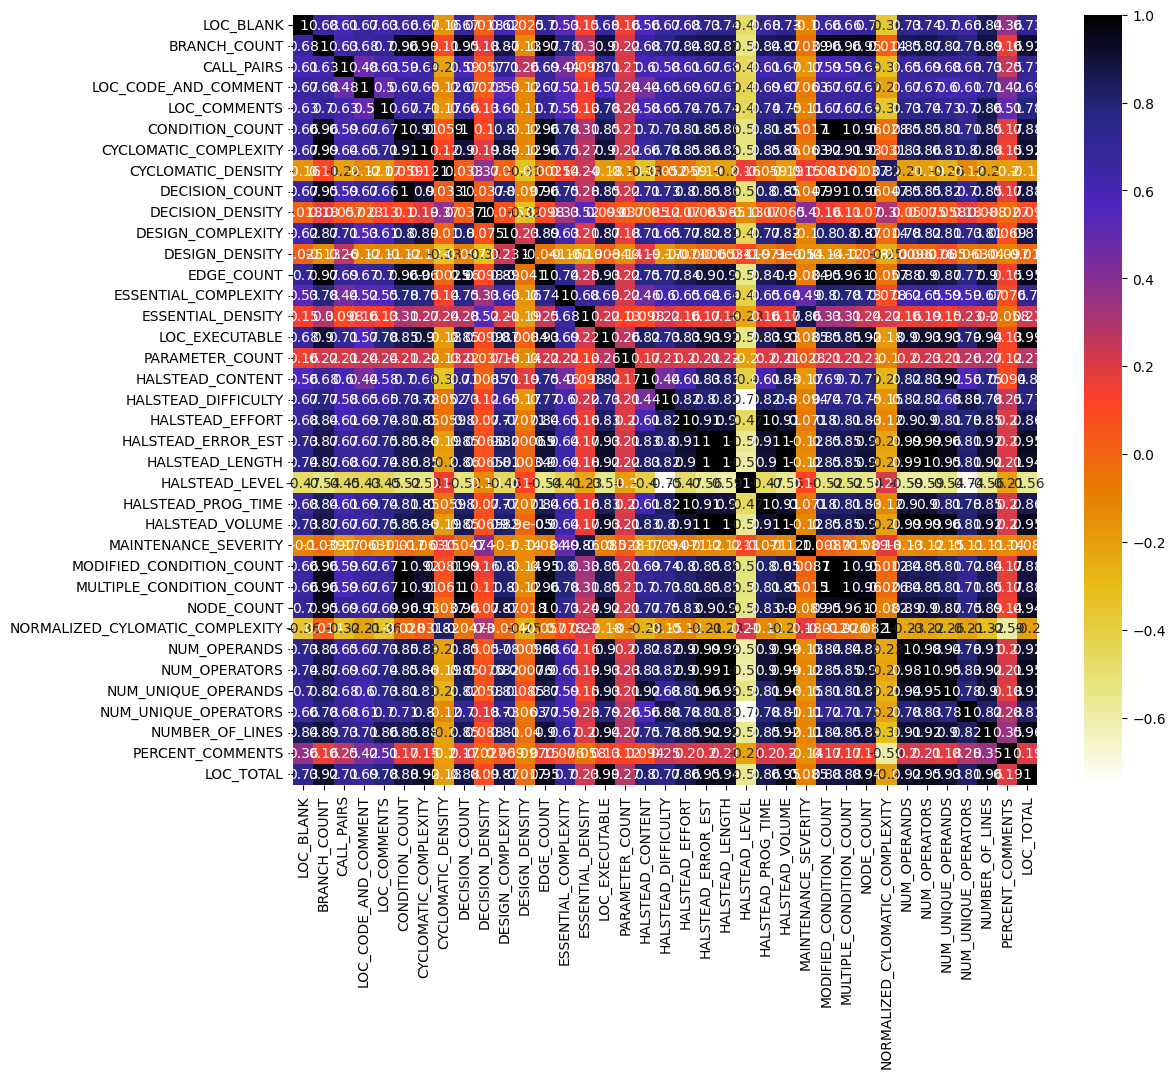

In [12]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [13]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.97)
print(len(set(corr_features)))
print(corr_features)

12
{'EDGE_COUNT', 'NUM_OPERANDS', 'MODIFIED_CONDITION_COUNT', 'HALSTEAD_LENGTH', 'MULTIPLE_CONDITION_COUNT', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'LOC_TOTAL', 'DECISION_COUNT', 'NODE_COUNT', 'NUM_OPERATORS', 'CYCLOMATIC_COMPLEXITY'}


In [14]:
X=X.drop(['HALSTEAD_PROG_TIME', 'CYCLOMATIC_COMPLEXITY', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'EDGE_COUNT', 'LOC_TOTAL', 'NUM_OPERANDS', 'DECISION_COUNT', 'NUM_OPERATORS', 'HALSTEAD_VOLUME', 'MODIFIED_CONDITION_COUNT', 'HALSTEAD_LENGTH'],axis=1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
trans = MinMaxScaler()
X = trans.fit_transform(X)
# # convert the array back to a dataframe
X = DataFrame(X)
# summarize
print(X.describe())

               0           1           2           3           4           5   \
count  327.000000  327.000000  327.000000  327.000000  327.000000  327.000000   
mean     0.183780    0.153812    0.236713    0.145448    0.147970    0.160463   
std      0.217006    0.206969    0.225094    0.222420    0.200633    0.212894   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.046375    0.033034    0.064019    0.000000    0.009174    0.040509   
50%      0.104343    0.066067    0.192056    0.055642    0.073396    0.081018   
75%      0.231873    0.198201    0.320093    0.166926    0.188077    0.202545   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          15  \
count  327.000000  327.000000  327.000000  327.000000  ...  327.000000   
mean     0.403070    0.095807    0.160280    0.688928  ...    0.275351   
std      0.184334    0.212610    0.209978    0.2

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state = 100)

In [17]:
i= X_train.shape[1]

In [18]:
i

25

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#SVM implementation
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(x_labels, y_labels, test_size=0.25, random_state=42)
print(len(X_train))

# SVM classifier
svm_classifier = SVC(kernel='linear', gamma=0.5, C=1)
#svm_classifier = SVC(kernel='rbf', gamma=0.5, C=1)
svm_classifier.fit(X_train, y_train)

#RandomForest Classifier
#rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_classifier.fit(X_train, y_train)
#y_pred_rf = rf_classifier.predict(X_test)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)
#y_pred_rf = rf_classifier.predict(X_test)
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Accuracy of SVM: {accuracy_svm}")
print("Confusion Matrix:")
print(conf_matrix_svm)

228
Accuracy of SVM: 0.898989898989899
Confusion Matrix:
[[89  0]
 [10  0]]
